In [2]:
import pandas as pd
filename = 'ping_analysis_result.txt'
data = []
with open(filename, 'r') as file:
    lines = file.readlines()
    i = 0
    while i < len(lines):
        if lines[i].startswith('\t'):
            # 0.7960429322429912 + 4.579265625 < 5.9745
            src_mid_latency, mid_dst_latency = lines[i].strip().split(' + ')
            src_mid_latency = float(src_mid_latency)
            mid_dst_latency, src_dst_latency = map(float,mid_dst_latency.split(' < '))
            row = {
                'src_probe': src_probe,
                'mid_probe': mid_probe,
                'dst_probe': dst_probe,
                'src_mid_latency': src_mid_latency,
                'mid_dst_latency': mid_dst_latency,
                'src_dst_latency': src_dst_latency
            }
            data.append(row)

        else:
            # print("A")
            # print(lines[i].strip().split(' < ')[0].split(' -> '))
            # print("A")
            src_probe, mid_probe, dst_probe = map(int, lines[i].strip().split(' < ')[0].split(' -> '))
            # print(src_probe, mid_probe, dst_probe)
        i += 1

df = pd.DataFrame(data)


In [3]:
df.head(10)

,src_probe,mid_probe,dst_probe,src_mid_latency,mid_dst_latency,src_dst_latency
0,1000023,1003746,6636,0.352033,4.579266,4.984031
1,1000062,6636,1003746,5.138891,1.885518,inf
2,1000173,1003746,6636,0.796043,4.579266,5.974500
3,1000185,1003746,6636,0.574904,4.579266,5.633563
4,1000199,1003746,6636,0.864860,4.579266,6.145516
5,1000215,1003746,6636,0.731306,4.579266,6.445984
6,1000237,1003746,6636,0.840626,4.579266,6.909234
7,1000254,1003746,6636,0.707233,4.579266,5.674531
8,1000261,1003746,6636,1.603460,4.579266,inf
9,1000318,1003746,6636,0.458871,4.579266,5.901016


In [4]:
df['src_probe'].nunique()

977

In [5]:
df.loc[df['src_dst_latency'] == float('inf'), 'dst_probe'].nunique()


2

In [6]:
df.loc[df['src_dst_latency'] == float('inf')].nunique()


src_probe          507
mid_probe            2
dst_probe            2
src_mid_latency    506
mid_dst_latency      2
src_dst_latency      1
dtype: int64

In [7]:
df['difference'] = df['src_dst_latency'] - (df['src_mid_latency'] + df['mid_dst_latency'])
df_sorted = df.sort_values('difference', ascending=False)
df_sorted.head()

,src_probe,mid_probe,dst_probe,src_mid_latency,mid_dst_latency,src_dst_latency,difference
489,3112,6636,1003746,3.985266,1.885518,inf,inf
526,33053,1003746,6636,1.128069,4.579266,inf,inf
578,35743,1003746,6636,0.062915,4.579266,inf,inf
579,35767,1003746,6636,1.196057,4.579266,inf,inf
580,35784,6636,1003746,7.021609,1.885518,inf,inf


In [9]:
df.loc[df['difference'] != float('inf')].nunique()

src_probe          470
mid_probe           10
dst_probe            2
src_mid_latency    471
mid_dst_latency     11
src_dst_latency    469
difference         471
dtype: int64

In [10]:
df.loc[df['src_probe'] == 6229].nunique()

src_probe          1
mid_probe          1
dst_probe          1
src_mid_latency    1
mid_dst_latency    1
src_dst_latency    1
difference         1
dtype: int64

In [11]:
import pandas as pd

# Create the DataFrame with 6 columns
columns = ['id', 'asn_v4', 'asn_v6', 'country', 'status', 'extra']
df_probes = pd.DataFrame(columns=columns)

# Read the CSV file into the DataFrame
df_probes = pd.read_csv('all_probes.csv', sep='\s+', names=columns, skiprows=3, skipfooter=2)

# Display the DataFrame
print(df_probes.head())


   id  asn_v4  asn_v6 country     status extra
0   1  206238  206238      nl  Connected  None
1   2    1136    1136      gu  Abandoned  None
2   3    1136    1136      nl  Connected  None
3   4    3265    3265      nl  Abandoned  None
4   5    3265    3265      nl  Abandoned  None


/var/folders/3p/6_h3x63x6w56sdyz8zw_tjn80000gn/T/ipykernel_71432/2325988085.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_probes = pd.read_csv('all_probes.csv', sep='\s+', names=columns, skiprows=3, skipfooter=2)


In [12]:
df_probes.head()

,id,asn_v4,asn_v6,country,status,extra
0,1,206238,206238,nl,Connected,None
1,2,1136,1136,gu,Abandoned,None
2,3,1136,1136,nl,Connected,None
3,4,3265,3265,nl,Abandoned,None
4,5,3265,3265,nl,Abandoned,None


In [21]:
df_probes[df_probes['id'] == 6556]

,id,asn_v4,asn_v6,country,status,extra
5072,6556,15763,15763,de,Connected,None


In [13]:
df_probes.drop('extra', inplace = True, axis=1)

In [14]:
df_probes.head()

,id,asn_v4,asn_v6,country,status
0,1,206238,206238,nl,Connected
1,2,1136,1136,gu,Abandoned
2,3,1136,1136,nl,Connected
3,4,3265,3265,nl,Abandoned
4,5,3265,3265,nl,Abandoned


In [15]:
src_df_probes = df_probes.rename(columns=lambda col: 'src_' + col)
mid_df_probes = df_probes.rename(columns=lambda col: 'mid_' + col)
dst_df_probes = df_probes.rename(columns=lambda col: 'dst_' + col)


In [16]:
dst_df_probes.head()

,dst_id,dst_asn_v4,dst_asn_v6,dst_country,dst_status
0,1,206238,206238,nl,Connected
1,2,1136,1136,gu,Abandoned
2,3,1136,1136,nl,Connected
3,4,3265,3265,nl,Abandoned
4,5,3265,3265,nl,Abandoned


In [17]:
len(df)

978

In [18]:
merged_df = df.merge(src_df_probes, how='inner', left_on='src_probe', right_on='src_id').drop('src_id', axis=1)
# merged_df = merged_df.merge(mid_df_probes, how='left', left_on='mid_probe', right_on='mid_id').drop('mid_id', axis=1)
# merged_df = merged_df.merge(dst_df_probes, how='left', left_on='dst_probe', right_on='dst_id').drop('dst_id', axis=1)
len(merged_df)

787

In [19]:
merged_df.head()

,src_probe,mid_probe,dst_probe,src_mid_latency,mid_dst_latency,src_dst_latency,difference,src_asn_v4,src_asn_v6,src_country,src_status
0,10188,1003746,6636,0.304172,4.579266,5.285344,0.401906,3320,3320,de,Connected
1,10194,1003746,6636,0.373000,4.579266,inf,inf,7922,7922,us,Connected
2,10243,6636,1003746,6.137594,1.885518,inf,inf,37084,37084,tz,Connected
3,1042,6636,1003746,2.112750,1.885518,inf,inf,7642,-,mv,Connected
4,1058,6636,1003746,3.025469,1.885518,inf,inf,209,7922,us,Connected


In [20]:
sorted_merged_df = merged_df.sort_values('difference', ascending=False)
sorted_merged_df.head()

,src_probe,mid_probe,dst_probe,src_mid_latency,mid_dst_latency,src_dst_latency,difference,src_asn_v4,src_asn_v6,src_country,src_status
786,975,6636,1003746,4.955984,1.885518,inf,inf,8881,8881,de,Connected
366,3406,6636,1003746,4.524734,1.885518,inf,inf,15943,15943,de,Disconnected
659,6438,6636,1003746,4.180828,1.885518,inf,inf,51859,51859,rs,Connected
660,6439,6636,1003746,4.105172,1.885518,inf,inf,55002,55002,de,Connected
362,33911,6636,1003746,5.023422,1.885518,inf,inf,31042,-,rs,Connected


In [22]:
sub_df = sorted_merged_df[(sorted_merged_df['src_country'] == 'us') & (sorted_merged_df['src_status'] == 'Connected')]
len(sub_df)

30

In [23]:
sub_df

,src_probe,mid_probe,dst_probe,src_mid_latency,mid_dst_latency,src_dst_latency,difference,src_asn_v4,src_asn_v6,src_country,src_status
1,10194,1003746,6636,0.373000,4.579266,inf,inf,7922,7922,us,Connected
379,35140,6636,1003746,3.505063,1.885518,inf,inf,20412,-,us,Connected
278,29062,1003746,6636,1.291453,4.579266,inf,inf,7922,7922,us,Connected
704,6794,6636,1003746,3.159609,1.885518,inf,inf,46997,46997,us,Connected
307,319,6636,1003746,2.287719,1.885518,inf,inf,1909,195,us,Connected
296,307,6636,1003746,2.531813,1.885518,inf,inf,7922,7922,us,Connected
590,55640,1003746,6636,0.483403,4.579266,inf,inf,31841,-,us,Connected
593,55798,1003746,6636,0.908766,4.579266,inf,inf,393238,-,us,Connected
506,52452,1003746,6636,0.500956,4.579266,inf,inf,11994,-,us,Connected
596,591,6636,1003746,3.510187,1.885518,inf,inf,20001,20001,us,Connected


Insights specific to SRC nodes in the US 

1.  1 - Comcast Business Gateway Router Type - acts as gateway between local traffic and rest of the world. It has no connectivity to marbis GmbH(German hosting company and a subsidiary of 1&1 IONOS SE) but can be connected via Bouygues Telecom SA, which is a major telecommunications company based in France.


2. 379 - Similarly CLARITY-TELECOM not connected to Bouygues Telecom SA but can be connected via marbis GmbH

3. 717 - Probe 6923 (the only connected probe in ONEQODEASSETS-AS-AP OneQode Gaming Carrier - datacenter, multihomed ISP) takes 3.870792 to reach BOUYGTEL-ISP - Bouygues Telecom SA but if connected via MARBIS - marbis GmbH can be 0.875992 faster.

4. 633 - Probe 62498 (TP-Link ER605 router type - for home and small office use- SPACEX-STARLINK) takes 6.572047s to reach 6636(MARBIS - marbis GmbH - Germany) but if connected via 1003746(BOUYGTEL-ISP - Bouygues Telecom SA - France) can be 0.806797s faster

----------------------

In [110]:
# sub_df = sorted_merged_df[(sorted_merged_df['src_country'] == 'us') & (sorted_merged_df['src_status'] == 'Connected') & (sorted_merged_df['src_asn_v4'] == '7922')]

In [95]:
# import pandas as pd

# # Read the CSV file into a pandas DataFrame
# ip_probe_df = pd.read_csv('ip_probes_mapping_after_measurements.csv')

# ip_probe_df.head()

# sub_df = sub_df.merge(ip_probe_df, how='inner', left_on='src_probe', right_on='Probe ID').drop('Probe ID', axis=1)
# sub_df.rename(columns={'IP Address': 'src_ip'}, inplace=True)

# sub_df = sub_df.merge(ip_probe_df, how='inner', left_on='mid_probe', right_on='Probe ID').drop('Probe ID', axis=1)
# sub_df.rename(columns={'IP Address': 'mid_ip'}, inplace=True)

# sub_df = sub_df.merge(ip_probe_df, how='inner', left_on='dst_probe', right_on='Probe ID').drop('Probe ID', axis=1)
# sub_df.rename(columns={'IP Address': 'dst_ip'}, inplace=True)

# # sub_df = sub_df[['src_ip', 'mid_ip', 'dst_ip', 'src_mid_latency', 'mid_dst_latency', 'src_dst_latency']]
# sub_df.head()


In [91]:
len(sub_df)

27

In [55]:
sorted_merged_df[(sorted_merged_df['src_country'] == 'us') & (sorted_merged_df['src_status'] == 'Connected')]['src_probe'].unique()


array([24998,  2111, 51943, 52008, 10194, 29062,   307,  4981,  4959,
         319, 35140,  1186, 12331, 13620, 53556,  1058, 52452,  4307])

In [37]:
merged_df[merged_df['mid_country'].isna()]['mid_probe'].unique()

array([1003746])

In [130]:
merged_df.head()

,src_probe,mid_probe,dst_probe,src_mid_latency,mid_dst_latency,src_dst_latency,difference,src_asn_v4,src_asn_v6,src_country,src_status
0,1000023,1003746,6636,0.352033,4.579266,4.984031,0.052733,NaN,NaN,NaN,NaN
1,1000062,6636,1003746,5.138891,1.885518,inf,inf,NaN,NaN,NaN,NaN
2,1000173,1003746,6636,0.796043,4.579266,5.974500,0.599191,NaN,NaN,NaN,NaN
3,1000185,1003746,6636,0.574904,4.579266,5.633563,0.479393,NaN,NaN,NaN,NaN
4,1000199,1003746,6636,0.864860,4.579266,6.145516,0.701390,NaN,NaN,NaN,NaN


In [33]:
merged_df['mid_probe'].unique()

array([1003746,    6636,    6356,    6959,    6913,    6845,    6915,
          6827,    6386,    7161])

In [38]:
merged_df['dst_probe'].unique()

array([   6636, 1003746])

In [127]:
merged_df.head()

,src_probe,mid_probe,dst_probe,src_mid_latency,mid_dst_latency,src_dst_latency,difference,src_asn_v4,src_asn_v6,src_country,src_status,mid_asn_v4,mid_asn_v6,mid_country,mid_status,dst_asn_v4,dst_asn_v6,dst_country,dst_status
0,52589,6827,6636,0.376625,3.91225,4.812953,0.524078,25596,-,nl,Connected,1111,-,at,Connected,199610,199610,au,Connected


In [106]:
merged_df.nunique()

src_probe          570
mid_probe            3
dst_probe            2
src_mid_latency    569
mid_dst_latency      3
src_dst_latency    291
difference         291
id                 570
asn_v4             321
asn_v6             127
country             70
status               3
extra                0
dtype: int64

In [119]:
import folium

# Create a map centered around a specific location
map = folium.Map(location=[0, 0], zoom_start=2)

# List of IP addresses
ips = ['67.161.160.12', '176.182.89.53', '128.0.115.66']

# Iterate over the IP addresses
for ip in ips:
    # Get the latitude and longitude for the IP address
    # Replace 'ip2location_latitude' and 'ip2location_longitude' with the actual latitude and longitude for the IP
    latitude = 38.25445
    longitude = -104.60914
    
    # Add a marker for each IP address
    folium.Marker(
        location=[latitude, longitude],
        popup=ip,
        icon=folium.Icon(color='blue')
    ).add_to(map)

# Display the map
map


              IP                 geometry
0  67.161.160.12  POINT (0.00000 0.00000)
1  176.182.89.53  POINT (0.00000 0.00000)
2   128.0.115.66  POINT (0.00000 0.00000)


/var/folders/3p/6_h3x63x6w56sdyz8zw_tjn80000gn/T/ipykernel_65414/2046209953.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


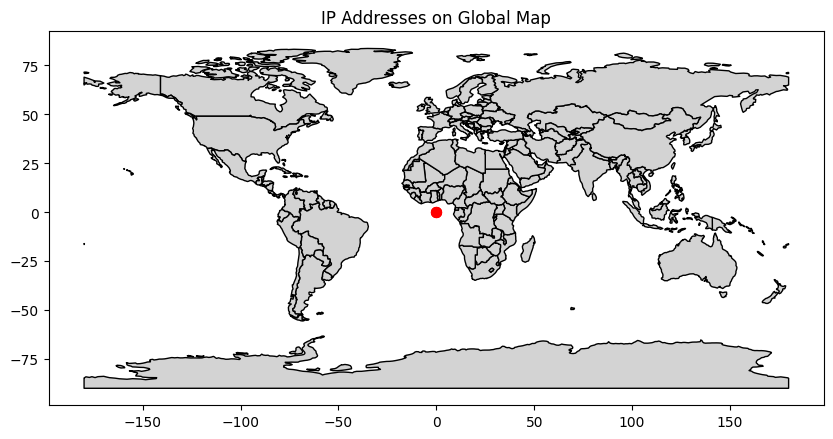

In [117]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a GeoDataFrame with the IP addresses as points
data = {'IP': ['67.161.160.12', '176.182.89.53', '128.0.115.66']}
df = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy([0]*len(data['IP']), [0]*len(data['IP'])))
print(df)
df.crs = 'EPSG:4326'  # Set the coordinate reference system to WGS84

# Read the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the IP addresses on the map
df.plot(ax=ax, color='red', markersize=50)

# Set plot title and show the plot
plt.title('IP Addresses on Global Map')
plt.show()
